In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [25]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

#fetch dataset
#bike_sharing = fetch_ucirepo()

In [27]:
# check which datasets can be imported
list_available_datasets()


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [28]:
#fetch_ucirepo(name='Bike Sharing')


In [29]:
bike_sharing = fetch_ucirepo(id =275)
bike_sharing

{'data': {'ids':        instant
  0            1
  1            2
  2            3
  3            4
  4            5
  ...        ...
  17374    17375
  17375    17376
  17376    17377
  17377    17378
  17378    17379
  
  [17379 rows x 1 columns],
  'features':            dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
  0      2011-01-01       1   0     1   0        0        6           0   
  1      2011-01-01       1   0     1   1        0        6           0   
  2      2011-01-01       1   0     1   2        0        6           0   
  3      2011-01-01       1   0     1   3        0        6           0   
  4      2011-01-01       1   0     1   4        0        6           0   
  ...           ...     ...  ..   ...  ..      ...      ...         ...   
  17374  2012-12-31       1   1    12  19        0        1           1   
  17375  2012-12-31       1   1    12  20        0        1           1   
  17376  2012-12-31       1   1    12  21        0        1    

In [30]:
# data(as pandas dataframes)
x = bike_sharing.data.features
y = bike_sharing.data.targets
print(y)

       cnt
0       16
1       40
2       32
3       13
4        1
...    ...
17374  119
17375   89
17376   90
17377   61
17378   49

[17379 rows x 1 columns]


In [31]:
## metadata
print(bike_sharing.metadata)

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [32]:
#X = X.fillna(method='bfill')
x.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [34]:
print(bike_sharing.variables)

          name     role         type demographic  \
0      instant       ID      Integer        None   
1       dteday  Feature         Date        None   
2       season  Feature  Categorical        None   
3           yr  Feature  Categorical        None   
4         mnth  Feature  Categorical        None   
5           hr  Feature  Categorical        None   
6      holiday  Feature       Binary        None   
7      weekday  Feature  Categorical        None   
8   workingday  Feature       Binary        None   
9   weathersit  Feature  Categorical        None   
10        temp  Feature   Continuous        None   
11       atemp  Feature   Continuous        None   
12         hum  Feature   Continuous        None   
13   windspeed  Feature   Continuous        None   
14      casual    Other      Integer        None   
15  registered    Other      Integer        None   
16         cnt   Target      Integer        None   

                                          description units mis

In [35]:
# converting catgorical to numerical data.
x['season']=x['season'].astype('category').cat.codes
# X['fuel-system']=X['fuel-system'].astype('category').cat.codes
x['yr']=x['yr'].astype('category').cat.codes
x['mnth']=x['mnth'].astype('category').cat.codes
x['hr']=x['hr'].astype('category').cat.codes
x['holiday']=x['holiday'].astype('category').cat.codes
x['season']=x['season'].astype('category').cat.codes
x['weekday']=x['weekday'].astype('category').cat.codes
x['workingday']=x['workingday'].astype('category').cat.codes
x['season']=x['season'].astype('category').cat.codes
x['weathersit']=x['weathersit'].astype('category').cat.codes
x['season']=x['season'].astype('category').cat.codes
x['dteday']=x['dteday'].astype('category').cat.codes


In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  int16  
 1   season      17379 non-null  int8   
 2   yr          17379 non-null  int8   
 3   mnth        17379 non-null  int8   
 4   hr          17379 non-null  int8   
 5   holiday     17379 non-null  int8   
 6   weekday     17379 non-null  int8   
 7   workingday  17379 non-null  int8   
 8   weathersit  17379 non-null  int8   
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int16(1), int8(8)
memory usage: 712.9 KB


In [38]:
# Train and Test split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

# Linear regression model
lr_bikesharing = LinearRegression()
lr_bikesharing.fit(X_train, y_train)
train_score_lr = lr_bikesharing.score(X_train, y_train)
test_score_lr = lr_bikesharing.score(X_test, y_test)
print('Linear regression:',train_score_lr, test_score_lr)


# Lasso regression model
lasso_bike_sharing = Lasso()
lasso_bike_sharing.fit(X_train, y_train)
train_score_lasso = lasso_bike_sharing.score(X_train, y_train)
test_score_lasso = lasso_bike_sharing.score(X_test, y_test)
print('Lasso regression:', train_score_lasso,test_score_lasso)

# Ridge regression model
Ridge_Bike_sharing = Ridge()
Ridge_Bike_sharing.fit(X_train, y_train)
train_score_ridge = Ridge_Bike_sharing.score(X_train, y_train)
test_score_ridge = Ridge_Bike_sharing.score(X_test, y_test)
print('ridge regression:',train_score_ridge, test_score_ridge)

#ElasticNet regession model
ElasticNet_bike_sharing = ElasticNet()
ElasticNet_bike_sharing.fit(X_train, y_train)
train_score_elastic = ElasticNet_bike_sharing.score(X_train, y_train)
test_score_elasticnet = ElasticNet_bike_sharing.score(X_train, y_train)
print('Elasticnet regression:',train_score_elastic, test_score_elasticnet)


result = pd.DataFrame({'LR score' : [train_score_lr,test_score_lr],'Lasso score' : [train_score_lasso,test_score_lasso], 
                       'Ridge score' : [train_score_ridge,test_score_ridge], 'Enet score': [train_score_elastic,test_score_elasticnet]},
                      index = ['Train score', 'Test score'])
result

Linear regression: 0.3898801755060033 0.3853820266418776
Lasso regression: 0.38601691103803637 0.380141413544946
ridge regression: 0.3898708347554075 0.38537281864420136
Elasticnet regression: 0.2827656573443801 0.2827656573443801


,LR score,Lasso score,Ridge score,Enet score
Train score,0.389880,0.386017,0.389871,0.282766
Test score,0.385382,0.380141,0.385373,0.282766


In [39]:
## prediction 
y_pred_BC_lr = np.round(lr_bikesharing.predict(X_test))
y_pred_BC_lr

array([[299.],
       [189.],
       [288.],
       ...,
       [247.],
       [151.],
       [140.]])

ValueError: x, y, and format string must not be None

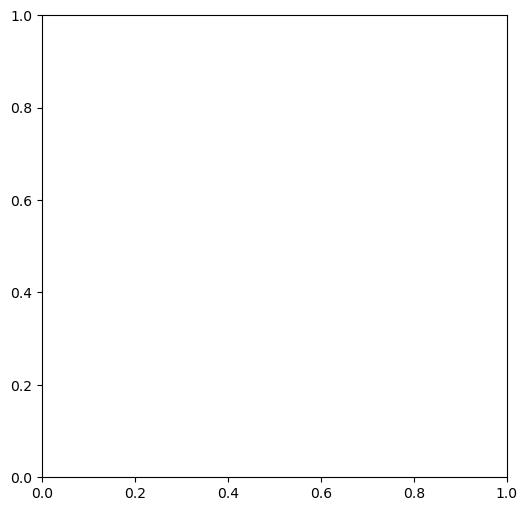

In [40]:
#3 Lets plot the coefficients for both the linear and ridge models
plt.figure(figsize= (6,6))
plt.plot(bike_sharing.feature_names,Ridge_Bike_sharing.coef_,alpha =1,linestyle = 'none',marker = '*',markersize = 5 ,
         color ='r',label = r'Ridge; $\alpha = 0.1$', zorder = 7) ## zorder is that we want it as first in order.

plt.plot(bike_sharing.feature_names,lr_bikesharing.coef_,alpha =0.6,linestyle = 'none',marker = 'o',markersize = 7 ,
         color ='green',label = 'Linear Regression')

plt.plot(bike_sharing.feature_names,lasso_bike_sharing.coef_,alpha =0.8,linestyle = 'none',marker = 'X',markersize = 9 ,
         color ='blue',label = 'Lasso Regression')

plt.plot(bike_sharing.feature_names,ElasticNet_bike_sharing.coef_,alpha =0.9,linestyle = 'none',marker = 'd',markersize = 10 ,
         color ='magenta',label = 'ElasticNet Regression')

plt.xticks(rotation =45)
plt.title('Comparing the coefficients values of LR, Lasso , Ridge, Enet models')
plt.legend()
plt.show()

## Lasso Cross Validation

In [41]:
## using the linear cv model
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
## Lasso Cross Validation
lasso_cv = LassoCV( alphas = [0.0001, 0.0002, 0.0009,0.001,0.002,0.003,0.0035,0.0003,0.01,0.1,1,10],random_state =10).fit(X_train,y_train)
 # score
print(f'training score : {lasso_cv.score(X_train,y_train)}')
print(lasso_cv.alpha_)

training score : 0.38986420913751796
0.0035


In [42]:
np.log(4)

1.3862943611198906

In [43]:
## Now choosing the random alpha values instead of giving them manually
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [44]:
alphas = np.logspace(-4,-1,10)
scores = np.empty_like(alpha)


for i,a in enumerate(alphas):
    lasso  = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_train,y_train)
print(scores)

[0.38986913 0.38986898 0.38986865 0.38986793 0.38986628 0.38986234
 0.38985215 0.38982361 0.38974036 0.38943576]


34.65460291878846


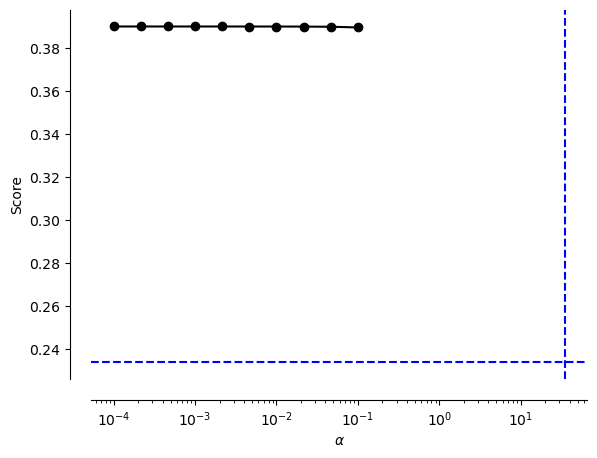

In [47]:
lassocv = LassoCV(random_state =0)
lassocv.fit(x,y)
lassocv_score = lassocv.score(X_train,y_train)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
## print('CV',lassocv.coef_)
plt.plot(alphas,scores,'-ko')
plt.axhline(lassocv_score,color = 'b', ls ='--')
plt.axvline(lassocv_alpha,color = 'b', ls ='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

## Model Tuning

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3,1,num =30)

model = make_pipeline(StandardScaler(), RidgeCV(alphas = alphas))
cv_results = cross_validate(model,X_train,y_train,return_estimator = True,n_jobs = 2)
print(cv_results)

{'fit_time': array([0.09397221, 0.09113574, 0.07810783, 0.07810783, 0.04686093]), 'score_time': array([0., 0., 0., 0., 0.]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-0

In [49]:
score = cv_results['test_score']
print(score)
print(f'R2 score: {score.mean():.3f} +_ {score.std(): .3f}')

[0.38618186 0.39326036 0.40098884 0.38495716 0.37680231]
R2 score: 0.388 +_  0.008


In [51]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3,1,num =30)

model = make_pipeline(Normalizer(), ElasticNetCV(alphas = alphas))
cv_results = cross_validate(model,X_train,y_train,return_estimator = True,n_jobs = 2)
print(cv_results)

{'fit_time': array([0.13224435, 0.1291225 , 0.11401892, 0.12107682, 0.08733273]), 'score_time': array([0.00268006, 0.00268006, 0.00606108, 0.00498676, 0.01562095]), 'estimator': [Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.887391